# Plotting temperature over time using the 'dryBulbTemperature_Celsius' data




## Description
***


This notebook analyzes the tempeture data and visualizes how the dry bulb temperature varies over time

The Dry bulb tempeture as referred to by the [National weather service](https://www.weather.gov/source/zhu/ZHU_Training_Page/definitions/dry_wet_bulb_definition/dry_wet_bulb.html) is the ambient air temperature usually indicated by a thermometer and is not affected by the moisture of the air.

## Imports and libraries
***


In [95]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## Load the data
***


In [96]:
# Load the data 

# The raw data URL from GitHub csv file
url = "https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/assignment/weatherreadings1.csv"
#Load the csv file into a data frame
df = pd.read_csv(url)


## Examining the data set
***



In [97]:
# Let's have a look
df. head ()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [98]:
# Describe the data set
df.describe()

,collectionName,observationType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,...,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,longitude,latitude,height,externalSiteId,version,externalId
count,89.0,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.0000,8.900000e+01,89.0,8.900000e+01,89.0,8.900000e+01
mean,1.0,1.0,188.292135,85.135955,2.866067,1.281245,53.030337,11.683521,50.375281,10.208489,...,29.962416,1014.643950,48.606742,9.225968,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257823e+10
std,0.0,0.0,144.536579,5.626101,2.637010,1.178847,3.373102,1.873946,2.165236,1.202909,...,0.036299,1.229232,1.627240,0.904022,0.0000,7.145685e-15,0.0,0.000000e+00,0.0,3.879131e+05
min,1.0,1.0,0.000000,70.400000,0.000000,0.000000,48.500000,9.166667,47.200000,8.444444,...,29.867000,1011.412803,46.000000,7.777778,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257757e+10
25%,1.0,1.0,40.000000,79.900000,1.000000,0.447039,50.500000,10.277778,48.800000,9.333333,...,29.947000,1014.121914,47.400000,8.555556,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257790e+10
50%,1.0,1.0,275.000000,87.200000,2.000000,0.894079,51.500000,10.833333,49.600000,9.777778,...,29.963000,1014.663736,48.300000,9.055556,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257824e+10
75%,1.0,1.0,333.000000,89.400000,3.750000,1.676397,55.800000,13.222222,52.000000,11.111111,...,29.991000,1015.611925,49.600000,9.777778,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257857e+10
max,1.0,1.0,359.000000,92.400000,14.250000,6.370309,60.700000,15.944444,54.700000,12.611111,...,30.015000,1016.424658,51.800000,11.000000,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257889e+10


In [99]:
# Information about the columns and types of variables
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

## Plotting
***


In [100]:
# datetime variable: 'reportStartDateTime' 
# This is the starting time date which represent the temperature at the beginning of each interval
# Convert 'reportStartDateTime' to datetime format

df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'])

In [108]:
# Sorting and organizing the datetime in ascending order
sorted_df = df.sort_values(by="reportStartDateTime")

 

In [106]:
## Display the first 10 rows
print(sorted_df['reportStartDateTime'].head(10))  


0   2024-10-02 16:15:00+00:00
1   2024-10-02 16:45:00+00:00
2   2024-10-02 17:00:00+00:00
3   2024-10-02 17:15:00+00:00
4   2024-10-02 17:30:00+00:00
5   2024-10-02 17:45:00+00:00
6   2024-10-02 18:00:00+00:00
7   2024-10-02 18:15:00+00:00
8   2024-10-02 18:30:00+00:00
9   2024-10-02 18:45:00+00:00
Name: reportStartDateTime, dtype: datetime64[ns, UTC]


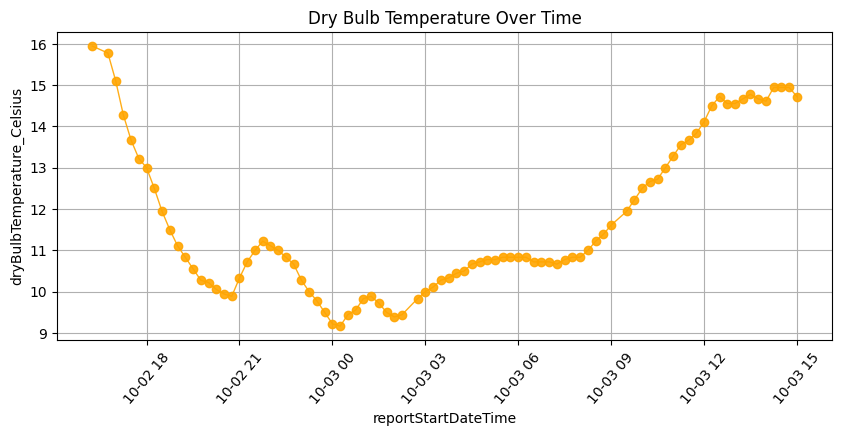

In [107]:
# Plotting dry bulb tempeture over time in Celsius
plt.figure(figsize=(10, 4))
plt.plot(sorted_df['reportStartDateTime'], df['dryBulbTemperature_Celsius'], color="orange", linestyle="-", linewidth="1", marker="o", alpha=0.9)

plt.xlabel("reportStartDateTime")
plt.ylabel("dryBulbTemperature_Celsius")
plt.title("Dry Bulb Temperature Over Time")
plt.grid(True)
plt.xticks(rotation=50)

plt.show()

***

### End
